# ExoMDN Guide

In this notebook we will show guides how to use the different features of ExoMDN.

## Importing the ExoMDN class

The ExoMDN class is the main class of the ExoMDN package. It handles the loading of models, making predictions, and provides interactive widgets for easy use.

In [1]:
from exomdn import ExoMDN

2025-08-06 14:57:53.866836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-06 14:57:53.909009: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Setting up the ExoMDN object

To set up the ExoMDN object, we need to specify the model path where the trained models are stored. By default, ExoMDN looks for models in the `./models` directory. We can change this path if needed.

In addition, we can specify the data path where the exoplanet data for the prediction widget is stored. By default, ExoMDN looks for data in the `./data` directory. This can also be changed if needed.

In [2]:
exo = ExoMDN(model_path="../models", data_path="../data")

## Loading a trained model

There's two ways to load a trained model in ExoMDN:
1. **Using the `load_model_widget`**: This widget allows you to interactively select which model to load from the available models in the specified model path.
2. **Using the `load_model` method**: This method allows you to load a specific model by providing the model path.

The model is accessible through the `exo.model` attribute after loading it.

In [3]:
# Using the load_model_widget to interactively select a model
exo.load_model_widget

LoadModelWidget(children=(Label(value='Select model:'), Select(layout=Layout(width='50%'), options=('mass_radi…

In [4]:
exo.load_model("../models/mass_radius_Teq/")  # Example of loading a specific model

Loaded model 'mass_radius_Teq'
Model architecture:

Model: "MDN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu_0 (Dense)              (None, 384)               1536      
                                                                 
 relu_1 (Dense)              (None, 384)               147840    
                                                                 
 relu_2 (Dense)              (None, 384)               147840    
                                                                 
 output_mdn (MDN)            (None, 650)               250250    
                                                                 
Total params: 547,466
Trainable params: 547,466
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Accessing the loaded model and its properties
print(f"Loaded model: {exo.model.model_name}")
print(f"Model inputs: {exo.model.inputs}")
print(f"Model outputs: {exo.model.outputs}")
print(f"Number of mixture components: {exo.model.components}")

Loaded model: mass_radius_Teq
Model inputs: ['planet_mass', 'planet_radius', 'T_eq']
Model outputs: ['log_d_mantle_core', 'log_d_water_core', 'log_d_atmosphere_core', 'log_m_mantle_core', 'log_m_water_core', 'log_m_atmosphere_core']
Number of mixture components: 50


## Making a prediction with the prediction widget

To make a simple prediction for a single planet, we can use the `prediction_widget`. This widget allows us to input the planet parameters and run the prediction. The output will be stored in the ExoMDN object and can be accessed through the `exo.prediction`, `exo.mixture_components`, and `exo.input_prompt` attributes.

The tab "Load exoplanet data" allows to load exoplanet data from the specified data path. The tab "Planet parameters" allows to input the planet parameters, such as mass, radius, and equilibrium temperature. The tab "Options" allows to specify the number of samples to draw from the predicted distribution and whether to include uncertainties in the prediction.

Uncertainties can be included by ticking the checkbox in "Planet parameters". The model then first samples a number of times from within the error bars (how often can be set with the "Uncertainty samples" option) and predicts an interior distribution from each. From each of these predictions a number of points is then sampled so that the total number fits as closely as possible to the specified total number of samples (e.g. with the default values of 10 000 total samples and 1000 uncertainty samples, the model predicts 1000 distributions from within the error bars and then samples 10 times from each predicted distribution to get to the total of 10 000)

In [6]:
exo.prediction_widget

PredictionWidget(children=(Accordion(children=(VBox(children=(HBox(children=(Select(layout=Layout(height='200p…

## Making a prediction programmatically

We can also make a prediction programmatically by using the `predict` method of the ExoMDN. This method takes the planet parameters as input and returns the predicted samples, mixture components, and input prompt. These are also stored in the ExoMDN object and are accessible through the `exo.prediction`, `exo.mixture_components`, and `exo.input_prompt` attributes.

In [5]:
prediction, mixture, input_prompt = exo.model.predict(
    x=[[1, 1, 255]],  # Example input for Earth
    samples=5000,  # Number of samples to draw from the predicted distribution
)

Running prediction (n=1)
1/1 [==============================] - 0s 63ms/step
Sampling from mixture (1x5000 samples)


In [6]:
# Accessing the prediction, mixture components, and input prompt
print(f"Input prompt: {input_prompt}")
print(f"Prediction shape: {prediction.shape}")
print(f"Mixture components shape: {mixture.shape}")

Input prompt:             planet_mass  planet_radius  T_eq
prediction                                  
0                     1              1   255
Prediction shape: (5000, 15)
Mixture components shape: (50, 22)


### Making a prediction for multiple planets

Multiple planets can be predicted at once by providing a list of planet parameters to the `predict` method. The input should be a list of lists, where each inner list contains the parameters for one planet.

In the `prediction` DataFrame, the `prediction` column will contain the index of the planet in the input list, which can be used to identify the planets in the output. The `prediction` DataFrame will also contain the predicted samples for each planet, and the `mixture_components` DataFrame will contain the mixture components for each planet.

In [9]:
prediction, mixture, input_prompt = exo.model.predict(
    x=[
        [1.374, 1.116, 400],  # TRAPPIST-1 b
        [1.308, 1.097, 342],  # TRAPPIST-1 c
        [0.388, 0.788, 288],  # TRAPPIST-1 d
        [0.692, 0.920, 251],  # TRAPPIST-1 e
        [1.039, 1.045, 219],  # TRAPPIST-1 f
        [1.321, 1.129, 199],  # TRAPPIST-1 g
        [1, 1, 255]           # Earth
    ],
    samples=5000)

Running prediction (n=7)
1/1 [==============================] - 0s 31ms/step
Sampling from mixture (7x5000 samples)


In [14]:
# Print unique predictions: Each planet is assigned a unique index with the `prediction` column
# Each index corresponds to a planet in the input list with 5000 samples
print(f"{prediction.groupby('prediction').size()}")

prediction
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
dtype: int64


## Making a prediction with uncertainties

To make a prediction with uncertainties, we can use the `predict_with_error` method of the ExoMDN object. This method takes the planet parameters and their uncertainties as input and returns the predicted samples, mixture components, and input prompt.

The uncertainties can be specified as a list of errors for each parameter. To set the samples, the method takes a list of two integers: the first integer is the number of uncertainty samples to draw from within the error bars, and the second integer is the total number of samples to draw from the predicted distribution.

The random samples used for the error bars are saved in the `input_prompt` attribute, which can be useful for reproducibility and debugging. The `input_prompt` will contain the random samples used for the prediction.

This method will discard planets which fall above the density of a pure iron sphere, as these are not physically meaningful.

In [16]:
prediction, mixture, input_prompt = exo.model.predict_with_error(
    x=[[1, 1, 255]],  # Example input for Earth
    errors=[[0.1, 0.1, 1]],  # Uncertainties for each parameter
    samples=[200, 100]  # [uncertainty_samples, per_prediction_samples]
)

4 points are outside the parameter limits and will not be used in the prediction. Current number of samples: 19600
Running prediction (n=196):
7/7 [==============================] - 0s 2ms/step
Sampling from predictions (1 predictions x 20000 samples):
1/1 [==============================] - 1s 631ms/prediction


In [18]:
print(f"Input prompt: {input_prompt.shape}")
print(f"Prediction shape: {prediction.shape}")
print(f"Mixture components shape: {mixture.shape}")
print(f"Prediction columns: {prediction.columns.tolist()}")

Input prompt: (196, 5)
Prediction shape: (19600, 16)
Mixture components shape: (9800, 23)
Prediction columns: ['log_d_mantle_core', 'log_d_water_core', 'log_d_atmosphere_core', 'log_m_mantle_core', 'log_m_water_core', 'log_m_atmosphere_core', 'prediction', 'mantle_rf', 'water_rf', 'atmosphere_rf', 'core_rf', 'mantle_mf', 'water_mf', 'atmosphere_mf', 'core_mf', 'subsample']


# Plotting the prediction

To easily visualize the output of the MDN, we can use the `cornerplot` function from the `exomdn.plotting` module. This function takes the prediction DataFrame, the mixture components DataFrame, and the columns to visualize (log-ratios of radius and mass fractions) as input.

The cornerplot method needs the following parameters:
- `data`: The prediction DataFrame containing the samples.
- columns: The columns from the prediction DataFrame to visualize. For convenience, the ExoMDN provides predefined lists of columns for radius fractions (`exo.rf`), mass fractions (`exo.mf`)

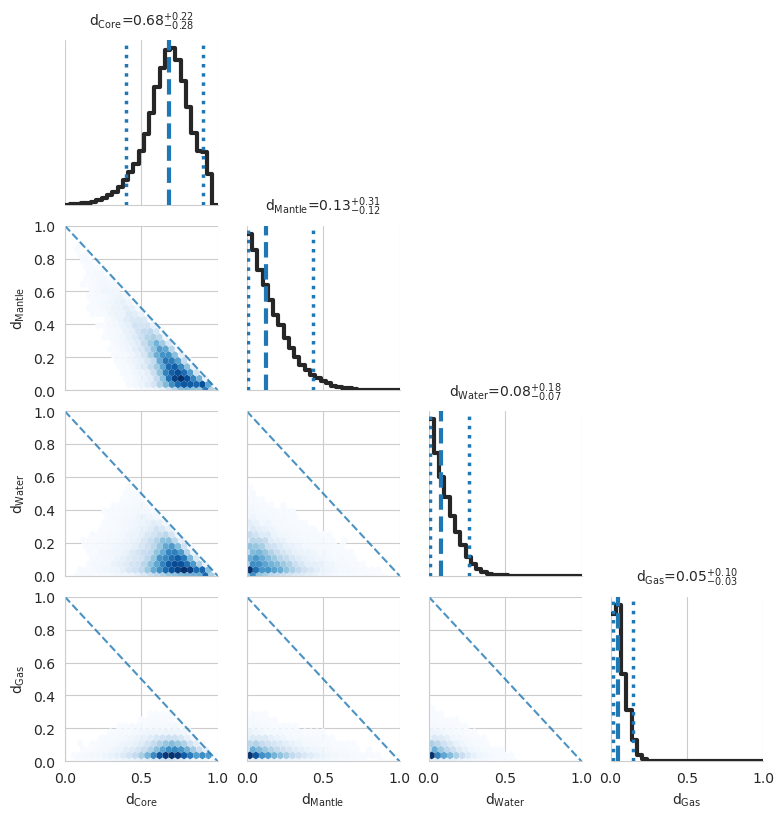

In [19]:
from exomdn.plotting import cornerplot
cornerplot(
    data=prediction,
    columns=exo.rf,  # Log-ratios of radius fractions
    height=2
)

### Accessing individual columns

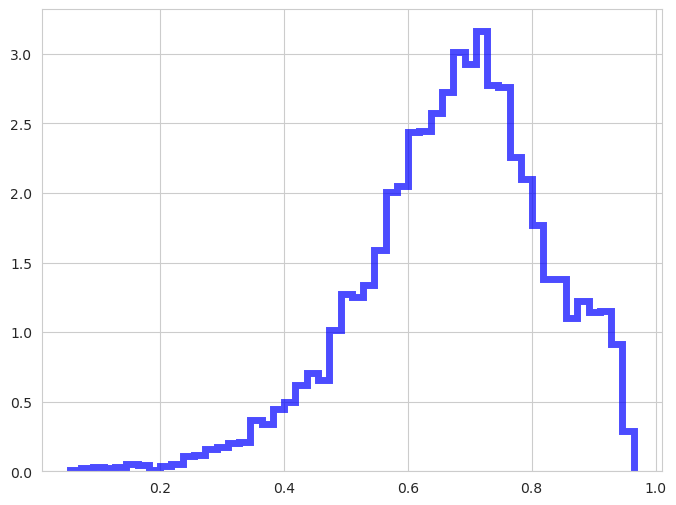

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))#
hist = ax.hist(exo.prediction["core_rf"], bins=50, density=True, alpha=0.7, color='b', histtype="step", lw=5)